# Ensemble Network
In this notebook we show our solution for finding the best ensemble networks using the models obtained during the pretrained analysis.


## Load the dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow import keras

from numpy.random import seed
seed(42)
tf.random.set_seed(42)

In [2]:
from sklearn import metrics
from sklearn.metrics import f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Creating the validation dataset and the test dataset 

In [4]:
X_validation_doc2Vec = np.load('/content/drive/MyDrive/Quora/Features/Doc2Vec/validation/full_question_doc2vec.npy')
X_validation_miniLM = np.load('/content/drive/MyDrive/Quora/Features/Sentence BERT/validation/full_question_sBERT.npy')
X_validation_mpnet = np.load('/content/drive/MyDrive/Quora/Features/all-mpnet-base-v2/validation/full_question_mpnet.npy')
#X_validation_distilroberta = np.load('/content/drive/MyDrive/Quora/Features/all-distilroberta-v1/validation/full_question_distilroberta.npy')

In [5]:
X_test_doc2Vec = np.load('/content/drive/MyDrive/Quora/Features/Doc2Vec/test/full_question_doc2vec.npy')
X_test_miniLM = np.load('/content/drive/MyDrive/Quora/Features/Sentence BERT/test/full_question_sBERT.npy')
X_test_mpnet = np.load('/content/drive/MyDrive/Quora/Features/all-mpnet-base-v2/test/full_question_mpnet.npy')
#X_test_distilroberta = np.load('/content/drive/MyDrive/Quora/Features/all-distilroberta-v1/test/full_question_distilroberta.npy')

In [6]:
validation_questions = pd.read_csv('/content/drive/MyDrive/Quora/Dataset/validation.csv')
y_validation_true = validation_questions[['is_duplicate']].squeeze().tolist()

In [7]:
test_questions = pd.read_csv('/content/drive/MyDrive/Quora/Dataset/test.csv')
y_test = test_questions[['is_duplicate']]
y_true = y_test.values.squeeze().tolist()

## The Ensemble classes
Before the ensemble class we need to define the models we have intention to use:

In [8]:
#distilalberta_models = [
#                       '/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_halving2.h5'#,
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_halving2_weighted.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_halving4.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_halving4_weighted.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_pace128.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_pace128_weighted.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_pace256.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_pace256_weighted.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_pace512.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_pace512_weighted.h5',
                       #'/content/drive/MyDrive/Quora/Models/Transfer Learning/distilroberta_DL_pace64.h5'
                       #]

mpnet_models = [
                #'/content/drive/MyDrive/Quora/Models/Transfer Learning/mpnet_DL_pace128.h5',
                '/content/drive/MyDrive/Quora/Models/Transfer Learning/mpnet_DL_pace128_weighted.h5']

doc2vec_models = [
                  '/content/drive/MyDrive/Quora/Models/Transfer Learning/doc2vec_DL_pace16.h5']#,
                  #'/content/drive/MyDrive/Quora/Models/Transfer Learning/doc2vec_DL_pace16_aug.h5',
                  #'/content/drive/MyDrive/Quora/Models/Transfer Learning/doc2vec_DL_pace16_aug_weighted.h5',
                  #'/content/drive/MyDrive/Quora/Models/Transfer Learning/doc2vec_DL_pace16_weighted.h5']

miniLM_models = [
                 #'/content/drive/MyDrive/Quora/Models/Transfer Learning/sentBERT_DL_pace96.h5',
                 #'/content/drive/MyDrive/Quora/Models/Transfer Learning/sentBERT_DL_pace96_aug.h5',
                 '/content/drive/MyDrive/Quora/Models/Transfer Learning/sentBERT_DL_pace96_aug_weighted.h5']#,
                 #'/content/drive/MyDrive/Quora/Models/Transfer Learning/sentBERT_DL_pace96_weighted.h5']                

## Predictions

In [9]:
distilroberta_predictions = [np.load('/content/drive/MyDrive/Quora/Predictions/predicted_val.npy')]

In [ ]:
distilroberta_predictions 

[array([[0.00143591],
        [0.8004187 ],
        [0.78254575],
        ...,
        [0.14644428],
        [0.3253738 ],
        [0.00099263]], dtype=float32)]

In [ ]:
'''distilroberta_predictions = []
for name in distilalberta_models:
  model = keras.models.load_model(name)
  distilroberta_predictions.append(model.predict(X_validation_distilroberta))'''

In [10]:
siamese_predictions = [np.load('/content/drive/MyDrive/Quora/Predictions/val_scores_siamese.npy')]
siamese_predictions

[array([[1.2166839e-04],
        [9.8037416e-01],
        [9.8969382e-01],
        ...,
        [1.5613773e-04],
        [9.8733389e-01],
        [1.2438234e-03]], dtype=float32)]

In [11]:
doc2vec_predictions = []
for name in doc2vec_models:
  model = keras.models.load_model(name)
  doc2vec_predictions.append(model.predict(X_validation_doc2Vec))

In [12]:
miniLM_predictions = []
for name in miniLM_models:
  model = keras.models.load_model(name)
  miniLM_predictions.append(model.predict(X_validation_miniLM))

In [13]:
mpnet_predictions = []
for name in mpnet_models:
  model = keras.models.load_model(name)
  mpnet_predictions.append(model.predict(X_validation_mpnet))

In [14]:
validation_scores = []
for pred in distilroberta_predictions:
  validation_scores.append(pred)
for pred in siamese_predictions:
  validation_scores.append(pred)
for pred in doc2vec_predictions:
  validation_scores.append(pred)
for pred in miniLM_predictions:
  validation_scores.append(pred)
for pred in mpnet_predictions:
  validation_scores.append(pred)

In [15]:
len(validation_scores)

5

For test set:

In [16]:
distilroberta_predictions = [np.load('/content/drive/MyDrive/Quora/Predictions/predicted_test.npy')]

In [ ]:
'''distilroberta_predictions = []
for name in distilalberta_models:
  model = keras.models.load_model(name)
  distilroberta_predictions.append(model.predict(X_test_distilroberta))'''

In [17]:
siamese_predictions = [np.load('/content/drive/MyDrive/Quora/Predictions/test_scores_siamese.npy')]
siamese_predictions

[array([[9.9985015e-01],
        [9.3571132e-01],
        [9.1084592e-05],
        ...,
        [7.4174267e-01],
        [3.9424241e-01],
        [4.0364016e-02]], dtype=float32)]

In [18]:
doc2vec_predictions = []
for name in doc2vec_models:
  model = keras.models.load_model(name)
  doc2vec_predictions.append(model.predict(X_test_doc2Vec))

In [19]:
miniLM_predictions = []
for name in miniLM_models:
  model = keras.models.load_model(name)
  miniLM_predictions.append(model.predict(X_test_miniLM))

In [20]:
mpnet_predictions = []
for name in mpnet_models:
  model = keras.models.load_model(name)
  mpnet_predictions.append(model.predict(X_test_mpnet))

In [21]:
test_scores = []
for pred in distilroberta_predictions:
  test_scores.append(pred)
for pred in siamese_predictions:
  test_scores.append(pred) 
for pred in doc2vec_predictions:
  test_scores.append(pred)
for pred in miniLM_predictions:
  test_scores.append(pred)
for pred in mpnet_predictions:
  test_scores.append(pred)

In [22]:
len(test_scores)

5

## Class

In [23]:
class Ensemble:
    def __init__(self, validation_scores, y_validation_true):
        self.y_validation_true = y_validation_true
        self.validation_scores = validation_scores

    def evaluate(self, weights):
        threshold = weights[-1]
        weights = weights[:-1]
        weighted_score = self.weighted_average_scores(self.validation_scores, weights)
        predictions = np.where(weighted_score > threshold, 1, 0)
        return f1_score(self.y_validation_true, predictions, average='macro')

    def weighted_average_scores(self, models_scores, weights):
        weighted_scores = []
        for m, w in zip(models_scores, weights):
            weighted_scores.append(m*w)
        weighted_average = np.average(weighted_scores, axis=0)
        return weighted_average

    def models_len(self):
        return len(self.validation_scores)

    def evaluate_ensemble(self, y_score, y_pred, y_true):
        '''
        evaluate_ensemble is used to plot some statistics about the performance on the test set
        '''
        print("Classification report: ")
        print(metrics.classification_report(y_true, y_pred, digits=4))
        metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

        # ROC curve
        fpr, tpr, th = metrics.roc_curve(y_true, y_score)
        roc_auc = metrics.roc_auc_score(y_true, y_score)

        plt.figure()
        plt.grid(False)
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

In [27]:
def evaluate_ensemble(y_score, y_pred, y_true):
    '''
    evaluate_ensemble is used to plot some statistics about the performance on the test set
    '''
    print("Classification report: ")
    print(metrics.classification_report(y_true, y_pred, digits=4))
    metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    # ROC curve
    fpr, tpr, th = metrics.roc_curve(y_true, y_score)
    roc_auc = metrics.roc_auc_score(y_true, y_score)

    plt.figure()
    plt.grid(False)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

### Genetic Algorithm Workflow 

In this section we use the ensemble class in order to find the best ensemble method using the precomputed models.
The first step is to download *Deap*

In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 5.2 MB/s 


Then we import all we need to use it 

In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Next step is to define the problem (we also save the number of predictions)

In [25]:
ensemble = Ensemble(validation_scores, y_validation_true)
INDIVIDUAL_LENGTH = ensemble.models_len() + 1
INDIVIDUAL_LENGTH

6

We define the GA constants

In [ ]:
BOUND_LOW, BOUND_UP = 0.0, 1.0  # boundaries for all dimensions

POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.5   # (try also 0.5) probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 5
CROWDING_FACTOR = 20.0  # crowding factor for crossover and mutation

In [ ]:
# set the random seed:
RANDOM_SEED = 42  # try also 17, 13,...
seed(RANDOM_SEED)

We create the toolbox

In [ ]:
toolbox = base.Toolbox()

Then we define the functions for creating the population

In [ ]:
# define a single objective, minimizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

In [ ]:
# helper function for creating random float numbers uniformaly distributed within a given range [low, up]
# it assumes that the range is the same for every dimension
def randomFloat(low, up):
    return [random.uniform(a, b) for a, b in zip([low] * INDIVIDUAL_LENGTH, [up] * INDIVIDUAL_LENGTH)]

# create an operator that randomly returns a float in the desired range and dimension:
toolbox.register("attr_float", randomFloat, BOUND_LOW, BOUND_UP)

In [ ]:
# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attr_float)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

We define the fitness:

In [ ]:
def ensembleF1(individual):
    return ensemble.evaluate(individual),

toolbox.register('evaluate', ensembleF1)

Genetic Operators

In [ ]:
# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/INDIVIDUAL_LENGTH)

Elistism

In [ ]:
def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

Flow:

gen	nevals	max     	avg     
0  	200   	0.883435	0.552412
1  	185   	0.883435	0.676955
2  	188   	0.883614	0.798663
3  	186   	0.883881	0.842308
4  	190   	0.884398	0.863365
5  	185   	0.884594	0.871729
6  	188   	0.884888	0.876592
7  	182   	0.884888	0.874304
8  	183   	0.884888	0.878244
9  	184   	0.885074	0.879477
10 	180   	0.885284	0.88076 
11 	183   	0.885284	0.882048
12 	188   	0.885388	0.882133
13 	184   	0.885459	0.882065
14 	190   	0.885489	0.883551
15 	183   	0.885489	0.883436
16 	188   	0.885489	0.883897
17 	188   	0.885489	0.884118
18 	186   	0.885489	0.884153
19 	189   	0.885545	0.884153
20 	184   	0.885545	0.884546
21 	187   	0.885545	0.884385
22 	182   	0.885545	0.884091
23 	188   	0.885596	0.884458
24 	189   	0.885596	0.884009
25 	184   	0.885596	0.883905
26 	183   	0.885628	0.883542
27 	192   	0.885664	0.883745
28 	184   	0.885729	0.884758
29 	190   	0.88576 	0.883599
30 	184   	0.88576 	0.884653
31 	189   	0.88576 	0.884618
32 	187   	0.88576 	0.883945
33 	188   	0.8

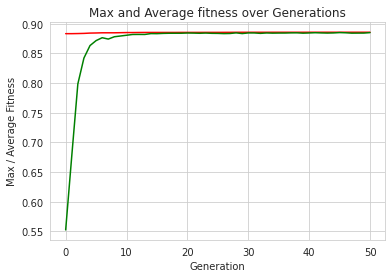

In [ ]:
# create initial population (generation 0):
population  = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print best solution found:
best = hof.items[0]
print("-- Best Ever Individual = ", best)
print("-- Best Ever Fitness = ", best.fitness.values[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

In [ ]:
hof.items

[[0.9816009254735635,
  0.9498029485579088,
  0.020774320450703807,
  0.7459131369333925,
  0.6162475176147064,
  0.3644184517582807],
 [0.9816009254735635,
  0.9498069659758934,
  0.020774320450703807,
  0.7459131369333925,
  0.6162475176147064,
  0.3644184517582807],
 [0.9800993386369313,
  0.9514201675710127,
  0.015659752451383548,
  0.7612600770183728,
  0.6568890919528059,
  0.3678491341881324],
 [0.9816009254735635,
  0.9498069659758934,
  0.01930153596534729,
  0.7459131369333925,
  0.6162475176147064,
  0.3644184517582807],
 [0.9816009254735635,
  0.9498069659758934,
  0.019114565669288805,
  0.7459131369333925,
  0.6162475176147064,
  0.3644184517582807]]

Classification report: 
              precision    recall  f1-score   support

           0     0.9205    0.8987    0.9095     25348
           1     0.8362    0.8696    0.8526     15080

    accuracy                         0.8878     40428
   macro avg     0.8784    0.8841    0.8810     40428
weighted avg     0.8891    0.8878    0.8882     40428



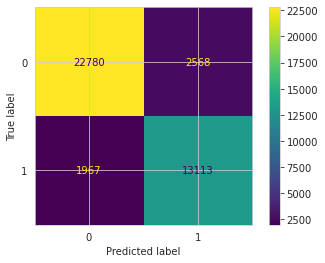

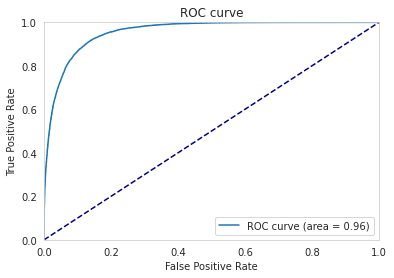

In [ ]:
test_ensemble_scores = ensemble.weighted_average_scores(test_scores, hof[0][:-1])
ensemble.evaluate_ensemble(test_ensemble_scores, np.where(test_ensemble_scores > hof[0][-1], 1, 0), y_true)

Classification report: 
              precision    recall  f1-score   support

           0     0.9205    0.8987    0.9095     25348
           1     0.8362    0.8696    0.8526     15080

    accuracy                         0.8878     40428
   macro avg     0.8784    0.8841    0.8810     40428
weighted avg     0.8891    0.8878    0.8882     40428



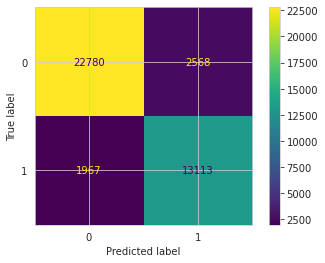

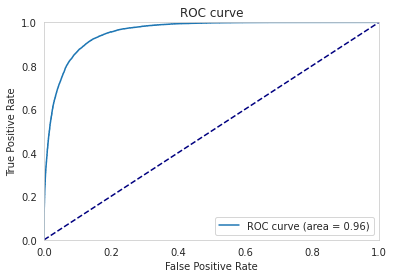

In [ ]:
test_ensemble_scores = ensemble.weighted_average_scores(test_scores, hof[1][:-1])
ensemble.evaluate_ensemble(test_ensemble_scores, np.where(test_ensemble_scores > hof[1][-1], 1, 0), y_true)

Classification report: 
              precision    recall  f1-score   support

           0     0.9220    0.8971    0.9094     25348
           1     0.8346    0.8725    0.8531     15080

    accuracy                         0.8879     40428
   macro avg     0.8783    0.8848    0.8813     40428
weighted avg     0.8894    0.8879    0.8884     40428



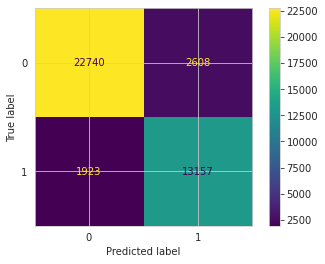

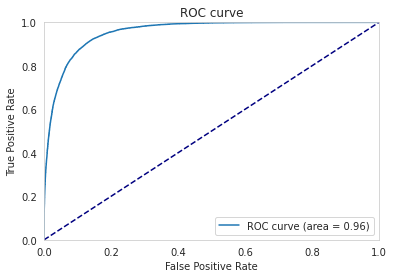

In [ ]:
test_ensemble_scores = ensemble.weighted_average_scores(test_scores, hof[2][:-1])
ensemble.evaluate_ensemble(test_ensemble_scores, np.where(test_ensemble_scores > hof[2][-1], 1, 0), y_true)

Classification report: 
              precision    recall  f1-score   support

           0     0.9220    0.8971    0.9094     25348
           1     0.8346    0.8725    0.8531     15080

    accuracy                         0.8879     40428
   macro avg     0.8783    0.8848    0.8813     40428
weighted avg     0.8894    0.8879    0.8884     40428



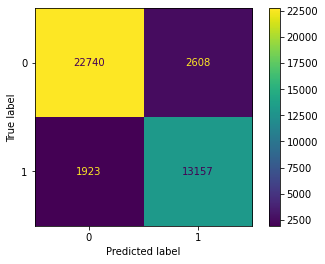

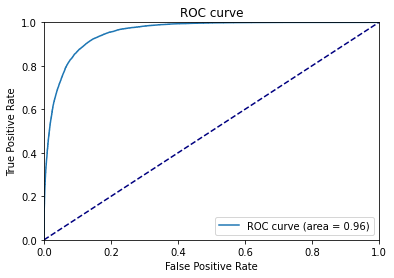

In [28]:
weights = [[0.9800993386369313,
  0.9514201675710127,
  0.015659752451383548,
  0.7612600770183728,
  0.6568890919528059,
  0.3678491341881324]]
test_ensemble_scores = ensemble.weighted_average_scores(test_scores, weights[0][:-1])
#ensemble.evaluate_ensemble(test_ensemble_scores, np.where(test_ensemble_scores > weights[0][-1], 1, 0), y_true)
final_predictions = np.where(test_ensemble_scores > weights[0][-1], 1, 0)
evaluate_ensemble(test_ensemble_scores, final_predictions, y_true)

In [ ]:
np.save('/content/drive/MyDrive/Quora/Predictions/final_ensemble_pred.npy', final_predictions)

Classification report: 
              precision    recall  f1-score   support

           0     0.9205    0.8988    0.9095     25348
           1     0.8364    0.8695    0.8526     15080

    accuracy                         0.8879     40428
   macro avg     0.8784    0.8842    0.8811     40428
weighted avg     0.8891    0.8879    0.8883     40428



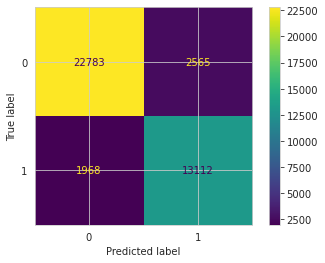

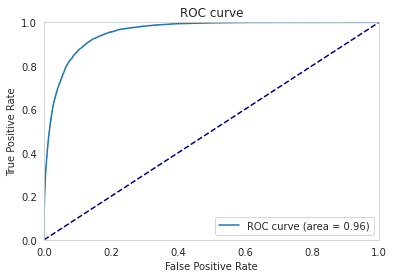

In [ ]:
test_ensemble_scores = ensemble.weighted_average_scores(test_scores, hof[3][:-1])
ensemble.evaluate_ensemble(test_ensemble_scores, np.where(test_ensemble_scores > hof[3][-1], 1, 0), y_true)

Classification report: 
              precision    recall  f1-score   support

           0     0.9205    0.8988    0.9095     25348
           1     0.8364    0.8694    0.8526     15080

    accuracy                         0.8879     40428
   macro avg     0.8784    0.8841    0.8810     40428
weighted avg     0.8891    0.8879    0.8883     40428



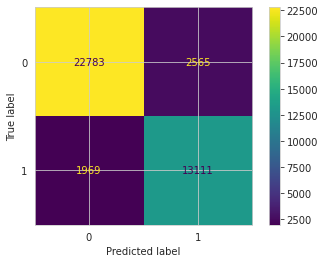

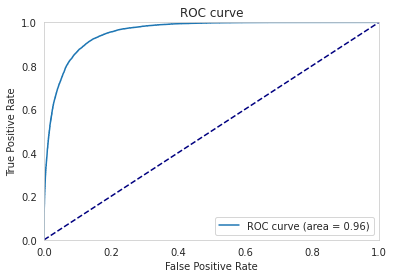

In [ ]:
test_ensemble_scores = ensemble.weighted_average_scores(test_scores, hof[4][:-1])
ensemble.evaluate_ensemble(test_ensemble_scores, np.where(test_ensemble_scores > hof[4][-1], 1, 0), y_true)